In [14]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize OneMax fitness function
fitness = mlrose_hiive.OneMax()

# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length =10, fitness_fn= fitness, maximize=True, max_val=30)

# Define decay schedule for simuladed annealing
schedule = mlrose_hiive.ExpDecay()

import time
# Solve using randomized Hill-Climbing   
startTime = time.time()
best_state_rhl, best_fitness_rhl, fitness_curve_rhl = mlrose_hiive.random_hill_climb(problem, max_attempts = 600,restarts= 5,
                                                      max_iters = 600, curve= True,
                                                      random_state = 42)
executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_rhl)
print('The fitness at the best state is: ', best_fitness_rhl)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_rhl)


# Solve using Simulated Annealing
startTime = time.time()
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 600, 
                                                      max_iters = 600, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_sa)
print('The fitness at the best state is: ', best_fitness_sa)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_sa)


# Solve using Genetic Algorithm
startTime = time.time()
best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.2, max_attempts = 600, 
                                                      max_iters = 600, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_ga)
print('The fitness at the best state is: ', best_fitness_ga)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_ga)

# Solve using MIMIC
startTime = time.time()
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts = 600, 
                                                      max_iters = 600, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_mimic)
print('The fitness at the best state is: ', best_fitness_mimic)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_mimic)

The best state found is:  [29 29 29 29 29 29 29 29 29 29]
The fitness at the best state is:  290.0
Execution time in seconds: 0.0638587474822998
The best state found is:  [29 29 29 29 29 29 29 29 29 29]
The fitness at the best state is:  290.0
Execution time in seconds: 0.0010182857513427734
The best state found is:  [29 29 29 29 29 29 29 29 29 29]
The fitness at the best state is:  290.0
Execution time in seconds: 4.902921915054321
The best state found is:  [29 29 29 28 24 29 25 28 27 29]
The fitness at the best state is:  277.0
Execution time in seconds: 18.28187656402588


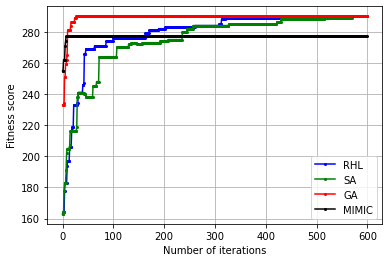

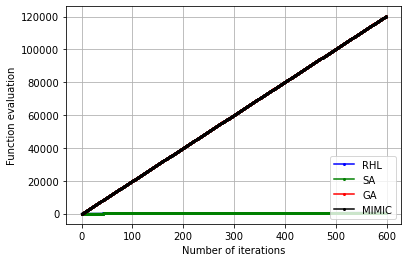

In [16]:
n=np.arange(0,600)
plt.plot(n, fitness_curve_rhl[:,0],marker='o', markersize=2,color='blue', label='RHC')
plt.plot(n, fitness_curve_sa[:,0],marker='o', markersize=2,color='green', label='SA')
plt.plot(n, fitness_curve_ga[:,0],marker='o', markersize=2,color='red', label='GA')
plt.plot(n, fitness_curve_mimic[:,0],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness score')
plt.legend(loc='lower right')
plt.grid()
plt.show()

n=np.arange(0,600)
plt.plot(n, fitness_curve_rhl[:,1]-fitness_curve_rhl[1,1],marker='o', markersize=2,color='blue', label='RHC')
plt.plot(n, fitness_curve_sa[:,1]-fitness_curve_sa[1,1],marker='o', markersize=2,color='green', label='SA')
plt.plot(n, fitness_curve_ga[:,1]-fitness_curve_ga[1,1],marker='o', markersize=2,color='red', label='GA')
plt.plot(n, fitness_curve_mimic[:,1]-fitness_curve_mimic[1,1],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Function evaluation')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [48]:
size=10
n_size=np.arange(1,size+1)
m=size
fitness_track=np.zeros([m, 4], dtype=int)
for i in range (1,size+1):
    problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn=fitness , maximize=True, max_val=30)
    best_state_rhl, best_fitness_rhl, fitness_curve_rhl = mlrose_hiive.random_hill_climb(problem, max_attempts = 400, max_iters = 400, curve= True,random_state = 42)
    best_state_sa, best_fitness_sa,fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 400, 
                                                      max_iters = 400, curve= False,
                                                      random_state = 42)
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.2, max_attempts = 40, 
                                                      max_iters = 40, curve= False,
                                                      random_state = 42)
    best_state_mimic, best_fitness_mimic, fitness_curbe_mimic  = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts = 20, 
                                                      max_iters = 20, curve= False,
                                                      random_state = 42)
    fitness_track[i-1,0]=best_fitness_rhl
    fitness_track[i-1,1]=best_fitness_sa
    fitness_track[i-1,2]=best_fitness_ga
    fitness_track[i-1,3]=best_fitness_mimic

#plotting the function evaluation in function of the size of the problem
print(fitness_track)

[[ 29  29  29  29]
 [ 58  58  58  58]
 [ 87  87  87  82]
 [116 116 116 111]
 [145 145 145 136]
 [173 174 174 168]
 [203 203 203 193]
 [231 229 232 213]
 [260 260 261 238]
 [289 285 290 277]]


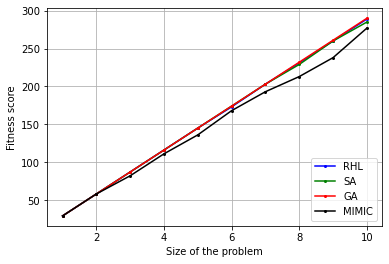

In [51]:
n_size=np.arange(1,size+1)
plt.plot(n_size, fitness_track[:,0],marker='o', markersize=2,color='blue', label='RHL')
plt.plot(n_size, fitness_track[:,1],marker='o', markersize=2,color='green', label='SA')
plt.plot(n_size, fitness_track[:,2],marker='o', markersize=2,color='red', label='GA')
plt.plot(n_size, fitness_track[:,3],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Size of the problem')
plt.ylabel('Fitness score')
plt.legend(loc='lower right')
plt.grid()
plt.show()